In [ ]:
pip install pandas seaborn matplotlib openpyxl

DataFrame loaded from Excel:
     Likes      Views     Pitch  Spectral Centroid  Spectral Bandwidth  \
0     77.0     2596.0  0.731235           0.220620            0.108066   
1  31000.0  1035409.0  0.675359           0.300604            0.486785   
2  19000.0   643458.0  0.900354           0.242679            0.324150   
3  32000.0  1096579.0  0.430993           0.100360            0.110407   
4  16000.0   559460.0  0.978208           0.735535            0.701557   

    Rolloff  Zero Crossing Rate  
0  0.268047            0.235821  
1  0.393102            0.130866  
2  0.297125            0.148198  
3  0.122186            0.056054  
4  0.787177            0.588928  

Correlation Matrix:
                       Likes     Views     Pitch  Spectral Centroid  \
Likes               1.000000  0.999990  0.110415           0.225804   
Views               0.999990  1.000000  0.111002           0.226132   
Pitch               0.110415  0.111002  1.000000           0.487627   
Spectral Centroid

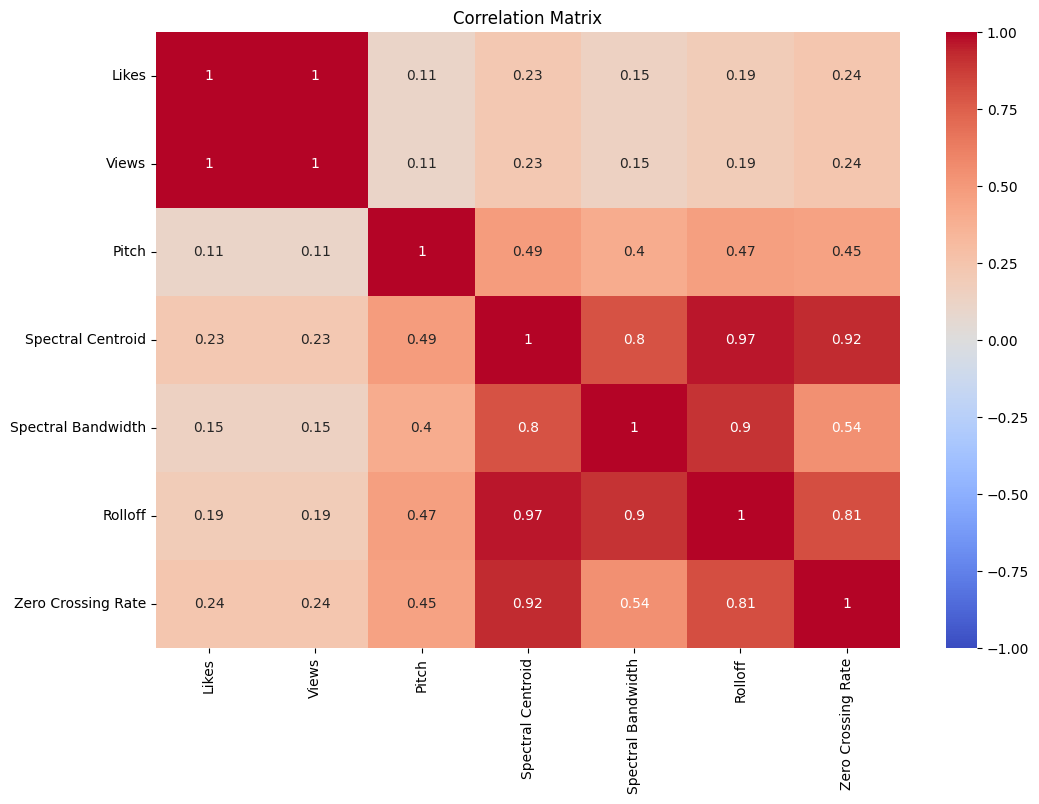

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the Excel file into a pandas DataFrame
file_path = '/home/rudra/Documents/GitHub/Articulation-Meter/Project Files/merged_excel_file.xlsx'  # Replace with your Excel file path
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
print("DataFrame loaded from Excel:")
print(df.head())



# Check for non-numeric columns and drop them before correlation computation
numeric_df = df.select_dtypes(include=[np.number])

# Standardize the numeric data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_df)
standardized_df = pd.DataFrame(standardized_data, columns=numeric_df.columns)

# Compute the correlation matrix
correlation_matrix = standardized_df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


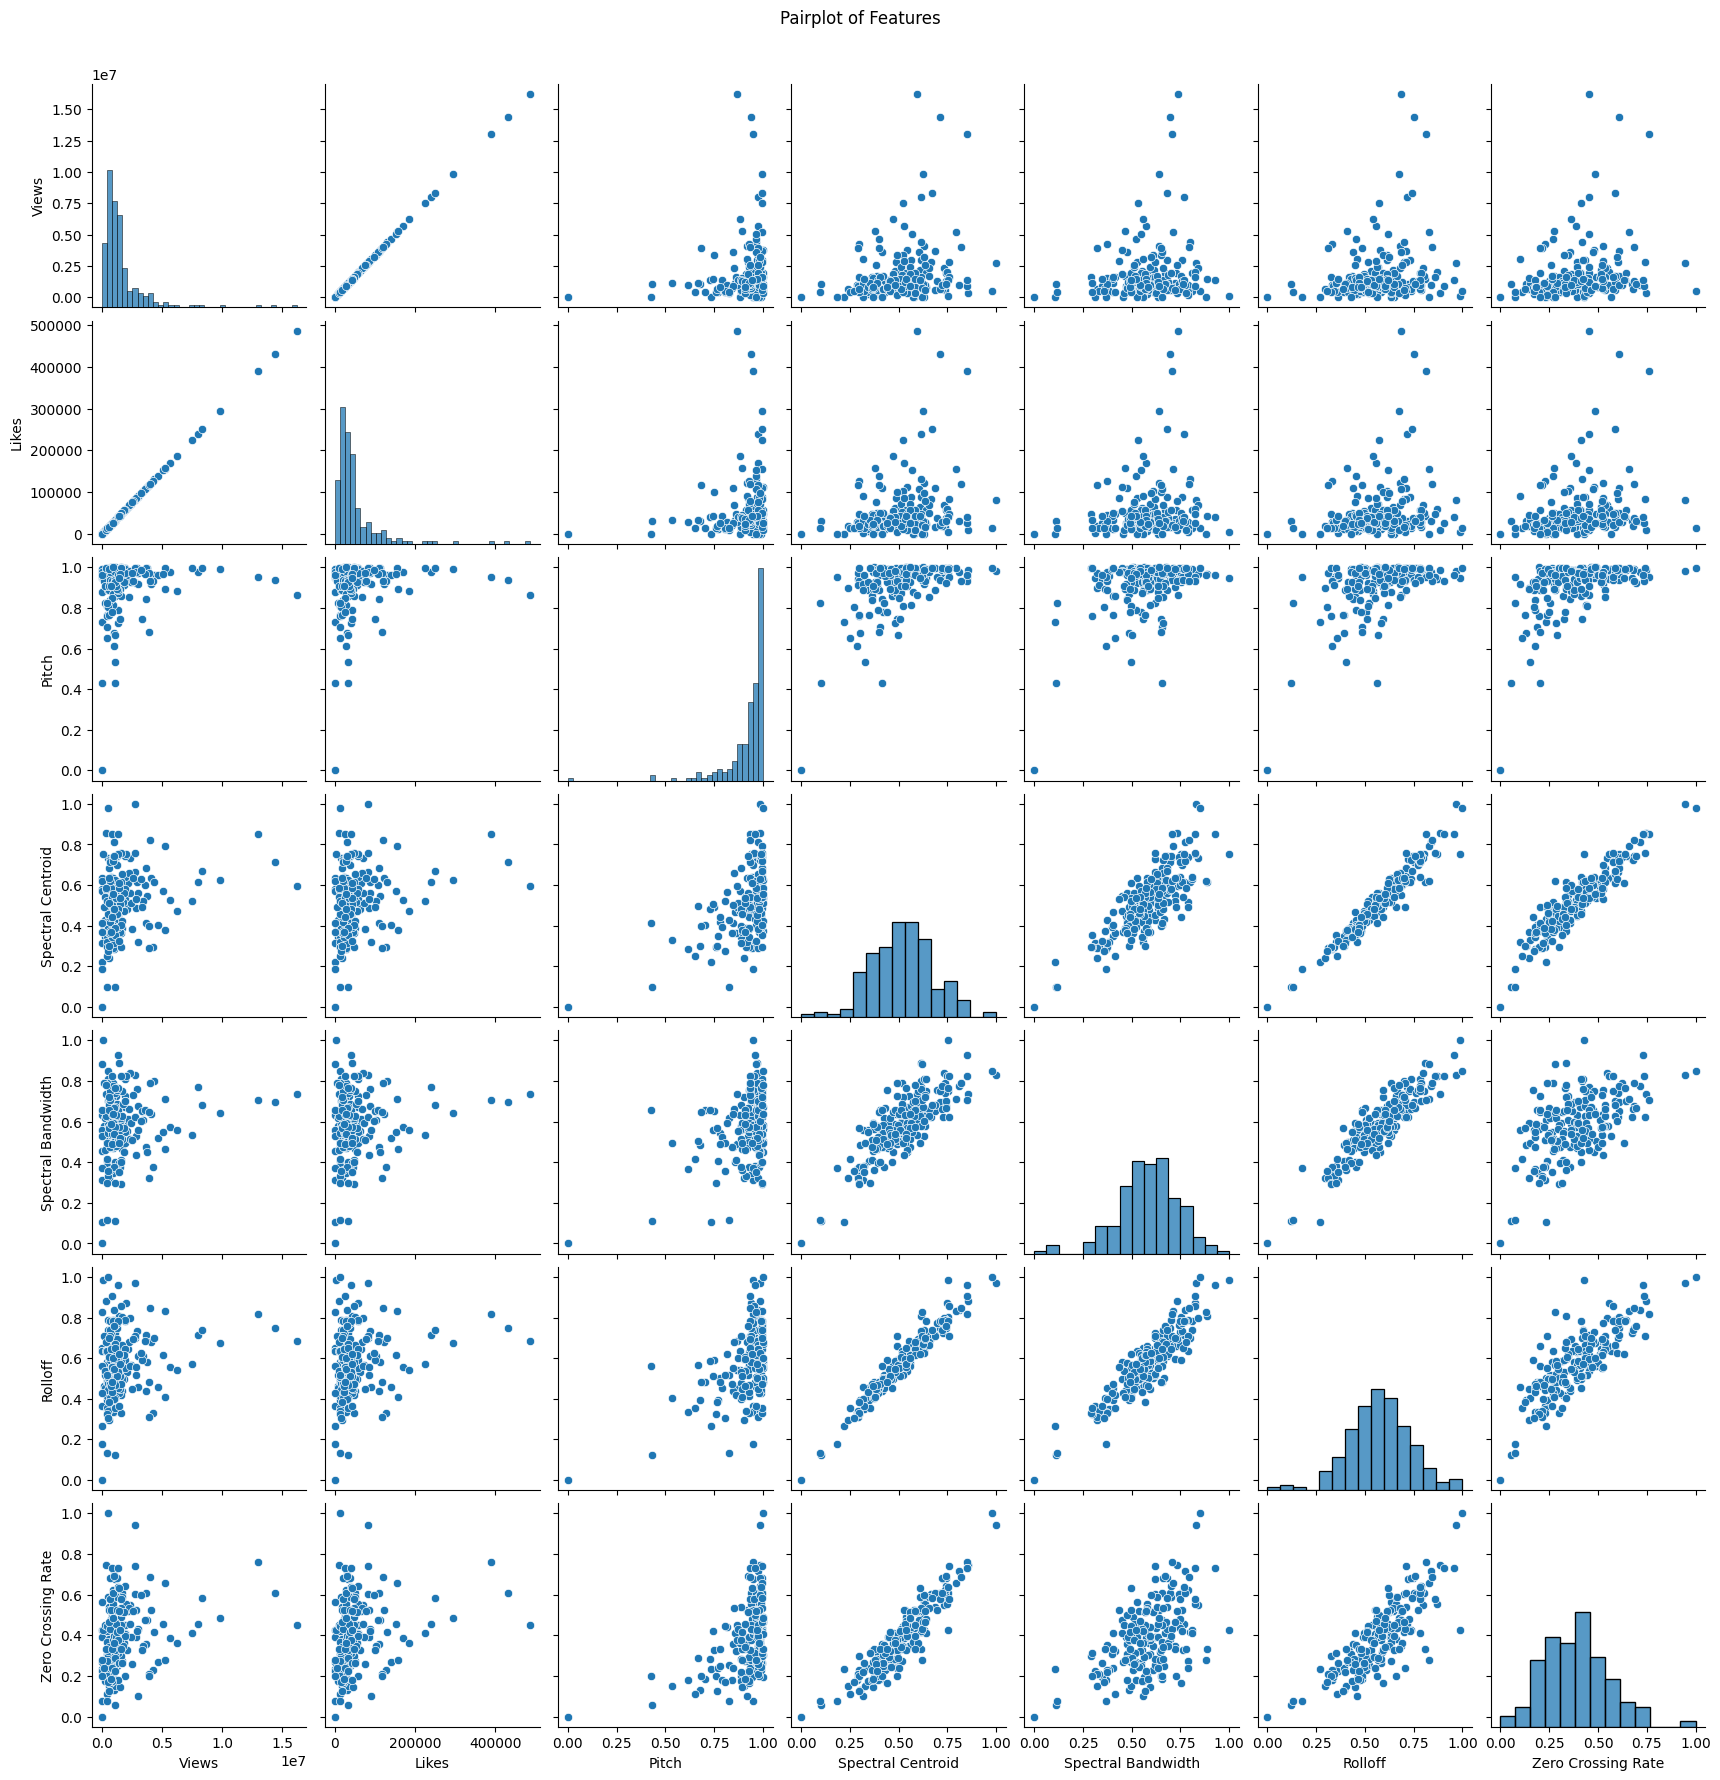

In [17]:

df.columns = df.columns.astype(str)


# Features
features = ['Views','Likes','Pitch', 'Spectral Centroid', 'Spectral Bandwidth', 'Rolloff', 'Zero Crossing Rate']

# Pairplot
sns.pairplot(df[features])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# # Scatter plots for specific features
# for i, feature1 in enumerate(features):
#     for j, feature2 in enumerate(features):
#         if i < j:
#             plt.figure(figsize=(10, 6))
#             plt.scatter(df[feature1], df[feature2], alpha=0.5)
#             plt.title(f'{feature1} vs {feature2}')
#             plt.xlabel(feature1)
#             plt.ylabel(feature2)
#             plt.show()


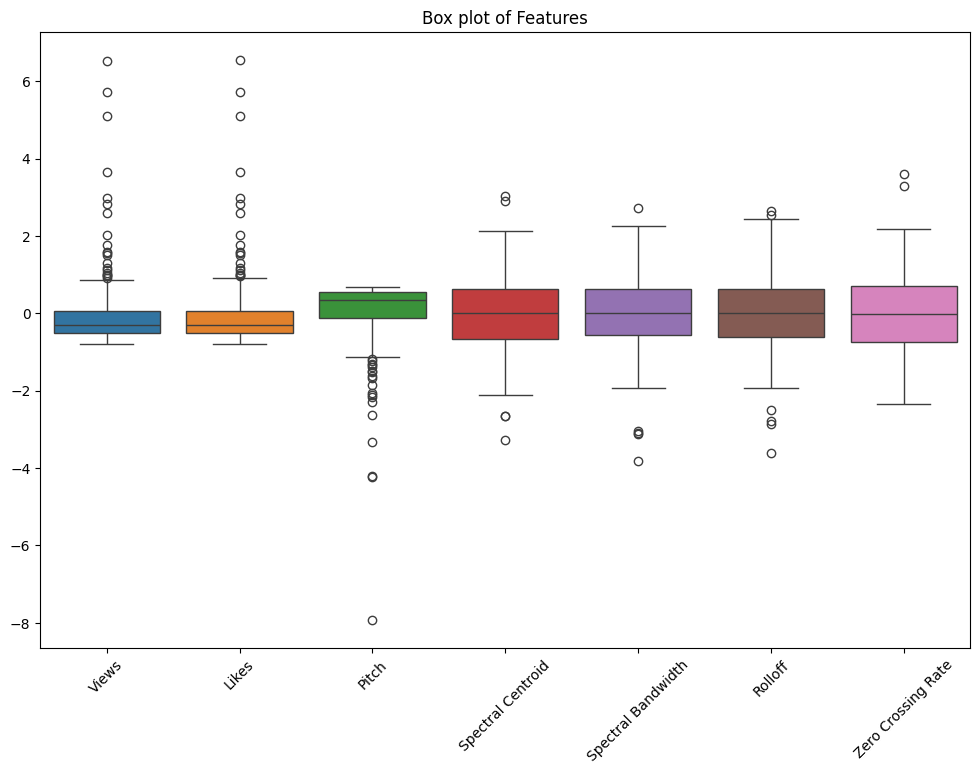

In [20]:

from sklearn.preprocessing import StandardScaler

# Load the Excel file into a pandas DataFrame
# file_path = '/home/rudra/Documents/GitHub/Articulation-Meter/Project Files/normalized_merged_excel_file.xlsx'  # Replace with your Excel file path
# df = pd.read_excel(file_path)

# Ensure all column names are strings
df.columns = df.columns.astype(str)

# Features
features = ['Views','Likes','Pitch', 'Spectral Centroid', 'Spectral Bandwidth', 'Rolloff', 'Zero Crossing Rate']

# Scale the features
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Box plot for distribution of features
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[features])
plt.title('Box plot of Features')
plt.xticks(rotation=45)
plt.show()

# Distribution plots for specific features
# for feature in features:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df[feature], kde=True)
#     plt.title(f'Distribution of {feature}')
#     plt.xlabel(feature)
#     plt.show()

# Pairplot for all features
# sns.pairplot(df[features])
# plt.suptitle('Pairplot of Features', y=1.02)
# plt.show()


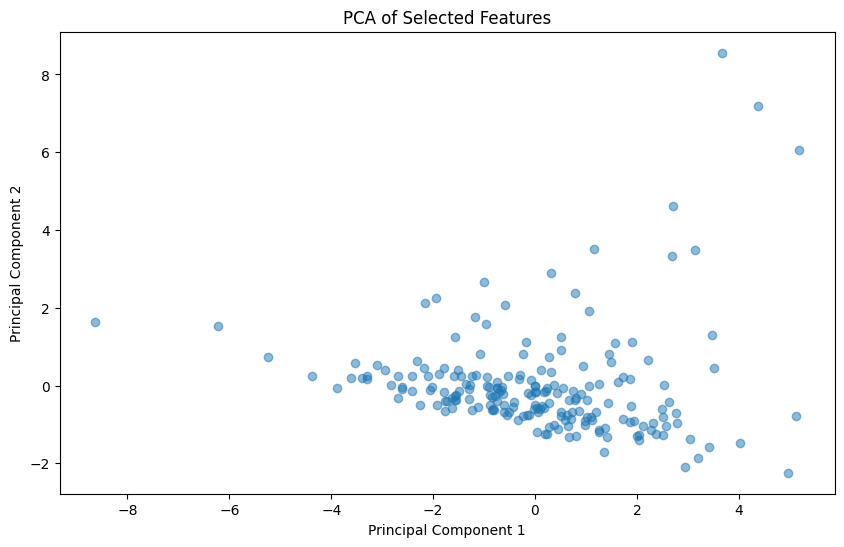

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the Excel file into a pandas DataFrame
# file_path = '/home/rudra/Documents/GitHub/Articulation-Meter/Project Files/merged_excel_file.xlsx'  # Replace with your Excel file path
# df = pd.read_excel(file_path)

# Ensure all column names are strings
df.columns = df.columns.astype(str)

# Selecting specified features
features = ['Views','Likes','Pitch',  'Spectral Centroid', 'Spectral Bandwidth', 'Rolloff', 'Zero Crossing Rate']

# Subset the DataFrame with selected features
selected_features_df = df[features]

# Handle missing values by imputing them
imputer = SimpleImputer(strategy='mean')
imputed_features = imputer.fit_transform(selected_features_df)

# Standardize the data before applying PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(imputed_features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Scatter plot of the PCA results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA of Selected Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
